## Problem: Predicting a Startups Profit/Success Rate using Multiple Linear Regression in Python.

### Determinining impacts of various dept. on profit.

### Model improvement method used : Backward Elimination.

### library used to build linear model : statsmodels

## Step 1: Importing basic libraries

In [51]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf # to build linear regression models
from statsmodels.graphics.regressionplots import influence_plot #for cooks dist. & residual vs lev graph

import warnings
warnings.filterwarnings('ignore')

## Step 2 : Dataset loading & Data preprocessing

In [52]:
dataset = pd.read_csv("50_Startups.csv")
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [53]:
dataset.shape

(50, 5)

In [54]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


in Datatype columns state is of 'object' datatype. So machine can't understand string/object datatype.So we need to encode with dummy variable.

 ###  Introducing dummy variables

In [55]:
dataset1 =dataset

In [56]:
pd.get_dummies(dataset1).head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


to avoid dummy variable trap we will remove first column. You may drop any one it.When dummy varibale coloumns are more that 1, then the logic behind to drop columns : total dummy variable columns -1 

In [57]:
dataset1 = pd.get_dummies(dataset1, drop_first=True)

In [58]:
dataset1.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [59]:
# Renaming dataset column names to avoid errors

dataset1 = dataset1.rename(columns={'R&D Spend':'RnD_Spend','Marketing Spend':'Marketing_Spend','State_New York':'State_NewYork'})

In [60]:
dataset1.head()

,RnD_Spend,Administration,Marketing_Spend,Profit,State_Florida,State_NewYork
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


## Step 4: Dividing Independent & Dependent variables.


In [61]:
# Independent variable;

X  = dataset1.drop(['Profit'], axis =1)

In [62]:
X.head()

,RnD_Spend,Administration,Marketing_Spend,State_Florida,State_NewYork
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [63]:
# Dependent variable

Y = dataset1[dataset1.columns[3:4]]
Y.head()

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


## Step 4 : Exploratory Data Analysis

#### 1. Checking correlation betwwen dependent and independent variable. Assumption which we are checking is,  all independet variables must be linear with depedent variable

<AxesSubplot:>

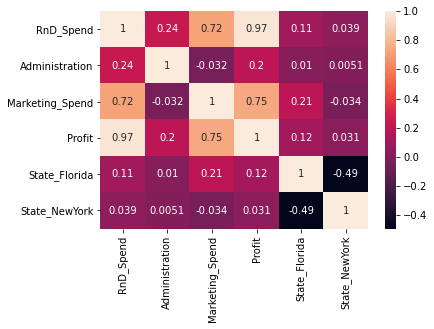

In [64]:
corr_X_Y  = sns.heatmap(dataset1.corr(), annot= True)
corr_X_Y

#### 2 . Cheking for multicolinirity. Assumption there is no correlation between indepedent variables.

<AxesSubplot:>

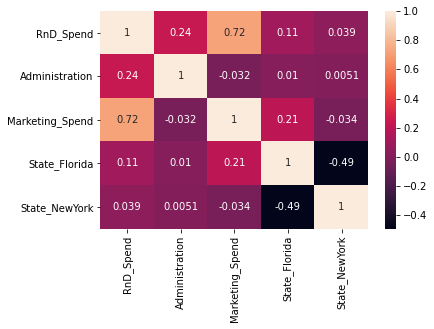

In [65]:
corr_X = sns.heatmap(X.corr(), annot=True)
corr_X

## Step 5: Model Building using statsmodels library

### 

we will use dataset1 which we genrated in step 3. Since splitting dataset and using it, will not work in stastmodels. statsmodels gives pure mathematical approach for linear regressions.

### MODEL 1

In [66]:
# import statsmodels.formula.api as smf

model1 = smf.ols("Profit~RnD_Spend+Administration+Marketing_Spend+State_Florida+State_NewYork",data = dataset1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Mon, 21 Sep 2020   Prob (F-statistic):           1.34e-27
Time:                        23:31:54   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
RnD_Spend           0.8060      0.046     17.369      0.000       0.712       0.900
Administration     -0.0270      0.052     -0.517      0.608      -0.132       0.078
Marketing_Spend     0.0270      0.017      1.574      0.123      -0.008       0.062
State_Florida     198.7888   3371.007      0.059      0.953   -6595.030    6992.607
State_NewYork     -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Model 1: Output conclusion

* R-squared: 0.951 , Adj. R-squared: 0.945 
* P_value fir State_Florida=0.953, State_NewYork=0.99 i.e greater than 0.05 that means these two factors are not significant. We can eliminate both.

### MODEL 2:

#### Note:  Eliminating 1) State_Florida	2) State_NewYork	

In [67]:
# import statsmodels.formula.api as smf

model2 = smf.ols("Profit~RnD_Spend+Administration+Marketing_Spend",data = dataset1).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Mon, 21 Sep 2020   Prob (F-statistic):           4.53e-30
Time:                        23:31:55   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RnD_Spend           0.8057      0.045     17.846      0.000       0.715       0.897
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing_Spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Model 2: Output conclusion

* R-squared: 0.951 , Adj. R-squared: 0.948 (Similar to model1 , not improved)
* P_value fir Administration=0.602 > 0.05, not significant so we can eliminate.

### MODEL 3:

#### Note:  Eliminating Administration

In [68]:
# import statsmodels.formula.api as smf

model3 = smf.ols("Profit~RnD_Spend+Marketing_Spend",data = dataset1).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Mon, 21 Sep 2020   Prob (F-statistic):           2.16e-31
Time:                        23:31:55   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
RnD_Spend           0.7966      0.041     19.266      0.000       0.713       0.880
Marketing_Spend     0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Model 3: Output conclusion

* R-squared: 0.950 , Adj. R-squared: 0.948 (Similar to model1 , not improved)
* P_value fir Marketing_Spend =0.060 > 0.05, not significant so we can eliminate.

* Also if go back 7 check correleation between marketing_spend and R&D_Spend it shows 0.72 that means there is colinearity between these two indepedent variables.
* Since p value is 0.06 which is not much away from 0.05 so can take decision based on corr. or VIF.
* Now for this case we can go with pvalue since R&D_Spend is exact 0 so will keep it.

### Model 4: 

#### Note:  Eliminating Marketing_Spend

In [69]:
# import statsmodels.formula.api as smf

model4 = smf.ols("Profit~RnD_Spend",data = dataset1).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Mon, 21 Sep 2020   Prob (F-statistic):           3.50e-32
Time:                        23:31:56   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
RnD_Spend      0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Step 6:  Model Validation

* Since we have come up to Model 4 as best fit model by eliminating insignificant indepedent variables . Now checking for any outliers present in dataset. 
* This will might help to improve model4

#### Elimination technique.

In [70]:
from statsmodels.stats.outliers_influence import OLSInfluence

res_diag = OLSInfluence(model4).summary_frame()
res_diag = pd.DataFrame(res_diag)
res_diag.head()

# this gives diff residual plot axis values. You can plot using this data

,dfb_Intercept,dfb_RnD_Spend,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.038896,0.065808,0.002753,0.220973,0.101318,0.074196,0.218771,0.073456
1,-0.072414,0.124209,0.009899,0.430520,0.096508,0.140706,0.426837,0.139502
2,-0.174071,0.315240,0.065177,1.211601,0.081556,0.361044,1.217678,0.362855
3,-0.136138,0.264966,0.049263,1.158889,0.068347,0.313888,1.163141,0.315040
4,0.051181,-0.101830,0.007598,-0.466406,0.065297,-0.123274,-0.462571,-0.122261


Now will sort top five cooks distance which are above 0.05

In [71]:
sort_cooks_d= res_diag.sort_values('cooks_d',ascending=False).round(3)
sort_cooks_d.head()

,dfb_Intercept,dfb_RnD_Spend,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
49,-1.253,1.067,0.562,-3.788,0.073,-1.060,-4.477,-1.253
45,0.468,-0.397,0.105,1.657,0.071,0.459,1.689,0.468
48,-0.430,0.365,0.090,-1.524,0.072,-0.424,-1.546,-0.430
14,0.105,-0.312,0.089,-2.049,0.041,-0.422,-2.122,-0.437
36,0.378,-0.274,0.072,1.863,0.040,0.379,1.914,0.389


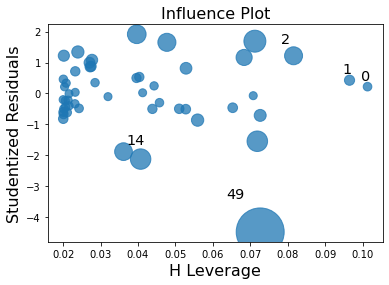

In [72]:
# What above sorting we did it can be understand by influence plot easily.
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model4)
plt.show()

* Output conclusion :
* Row no. 49 indicates 0.562 which is more than 0.05. We can delete it. Aviod multidatapoints deleting method. Since we have only 50 no. of obs. in dataset.
* above output gives cooks_D and other parameters to plot diff graph using this data. we will check cooks_d >0.05
* Note: We can use below codes to plot cooks distance.

* we can also fallow below method to plot & get cooks distance as well as influence plot

In [73]:
model4_influence = model4.get_influence()
(c,_) = model4_influence.cooks_distance

In [74]:
c # this gives cooks distance values.

array([2.75252280e-03, 9.89908565e-03, 6.51765486e-02, 4.92628317e-02,
       7.59828403e-03, 7.33387104e-03, 2.21412554e-02, 6.73661506e-03,
       1.01619773e-05, 5.81403631e-03, 1.66061312e-02, 1.36996956e-02,
       2.16575937e-02, 6.13884016e-03, 8.90397517e-02, 6.30133674e-02,
       1.51718150e-02, 2.94329347e-03, 1.35430569e-03, 8.88551585e-07,
       2.17640968e-03, 2.60842890e-03, 4.21074221e-04, 4.82942604e-04,
       4.68512581e-03, 1.19729011e-03, 6.88519548e-03, 3.72111671e-03,
       5.73468418e-04, 2.01430573e-03, 5.31240320e-04, 1.80999487e-03,
       4.12635748e-03, 1.56789281e-05, 1.04277371e-02, 1.08303093e-02,
       7.16494391e-02, 1.81926575e-03, 6.59971284e-02, 1.80059405e-04,
       5.21569633e-03, 6.02155910e-03, 1.40828291e-03, 1.85762695e-02,
       2.18683314e-03, 1.05297577e-01, 2.04992283e-04, 1.99584124e-02,
       8.98899423e-02, 5.62061026e-01])

note: obs first and second code line output & explore

#### cook's distance & Std. residuals vs leverage plots.

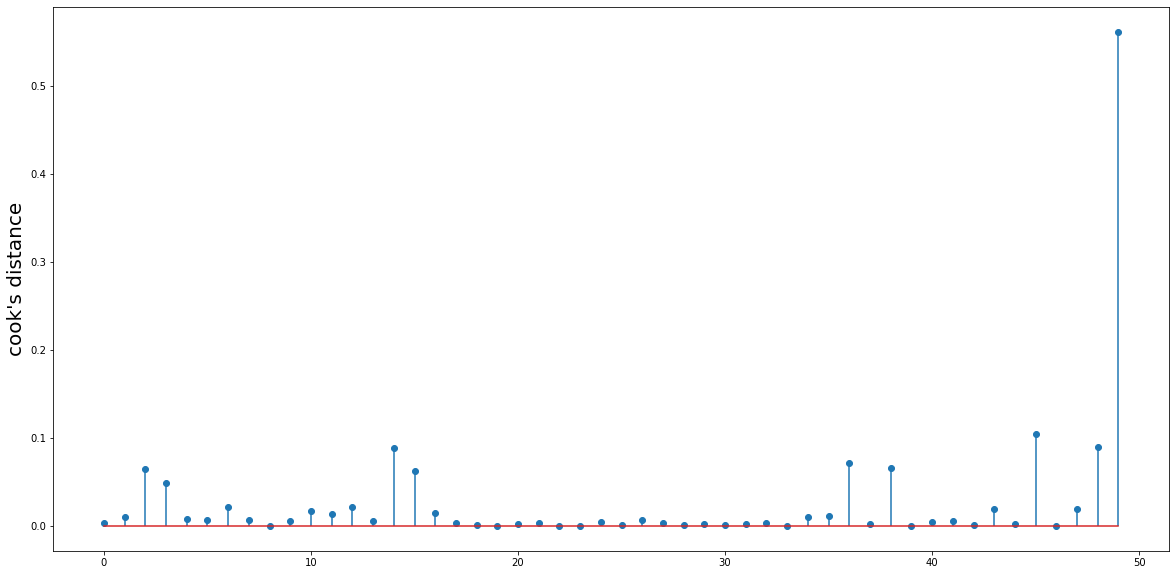

In [75]:
# cook's distance plot

fig = plt.subplots(figsize= (20,10))
plt.stem(np.arange(len(dataset1)), np.round(c,3))
plt.tick_params(axis='both', which='major', labelsize=10) 
plt.ylabel("cook's distance", fontsize = 20)
plt.show()

In [76]:
# Now checking, for which row cook's distance is max.

(np.argmax(c), np.max(c))  # similarly we have sorted cooks distance values in previous stemp.

(49, 0.5620610259264277)

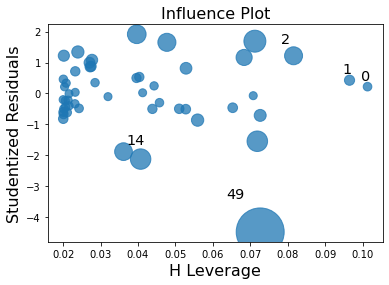

In [77]:
# plotting influence plot.

from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model4)
plt.show()

#### Delting 49 no. row from dataset1

In [78]:
dataset2 = dataset1.drop(dataset1.index[[49]], axis = 0)

### Model 5 :checking for model summary after eliminating 49th row 

In [79]:
dataset2.shape

(49, 6)

In [80]:
dataset2.head()

,RnD_Spend,Administration,Marketing_Spend,Profit,State_Florida,State_NewYork
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [81]:
model5 = smf.ols("Profit~RnD_Spend",data = dataset2).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     1055.
Date:                Mon, 21 Sep 2020   Prob (F-statistic):           7.56e-34
Time:                        23:32:02   Log-Likelihood:                -508.68
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      47   BIC:                             1025.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.172e+04   2229.914     23.195      0.000    4.72e+04    5.62e+04
RnD_Spend      0.8278      0.025     32.477      0.000       0.777       0.879
==============================================================================
Omnibus:                        0.070   Durbin-Watson:                   1.372
Prob(Omnibus):                  0.966   Jarque-Bera (JB):                0.203
Skew:                          -0.080   Prob(JB):                        0.903
Kurtosis:                       2.728   Cond. No.                     1.71e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* Output : R-squared:	0.957, Adj. R-squared:	0.956, Which is good.

### Step 7 : Predicting proft

In [82]:
# Splitting dataset1  into Dependent & Independent variable.

X1 = pd.DataFrame(dataset2.drop(['Profit'], axis = 1))

In [83]:
X1.head()

,RnD_Spend,Administration,Marketing_Spend,State_Florida,State_NewYork
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [84]:
Y1 = dataset2[dataset2.columns[3:4]]

In [85]:
Y1.head()

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [94]:
# predicting results

Profit_predict = model5.predict(X1)
Profit_predict_DF = pd.DataFrame(Profit_predict.round(2), columns=['Predicted'])

In [96]:
Profit_predict_DF.head()

,Predicted
0,188606.57
1,186328.77
2,178748.90
3,171241.12
4,169366.00


In [97]:
Comparison = pd.concat([Y1, Profit_predict_DF], axis='columns')
Comparison.head()


,Profit,Predicted
0,192261.83,188606.57
1,191792.06,186328.77
2,191050.39,178748.90
3,182901.99,171241.12
4,166187.94,169366.00


### Step 7 : Checking model accuracy

In [120]:
from sklearn.metrics import mean_squared_error 

np.sqrt(mean_squared_error(Y1, Profit_predict_DF))

7803.176297799165

* Note: Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit.

<AxesSubplot:xlabel='Profit', ylabel='Predicted'>

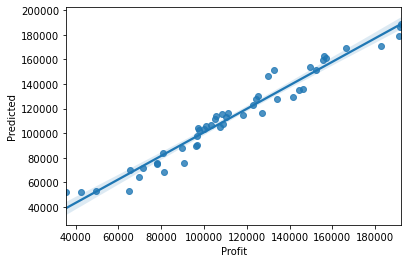

In [40]:
sns.regplot(x='Profit', y='Predicted', data= Comparison)

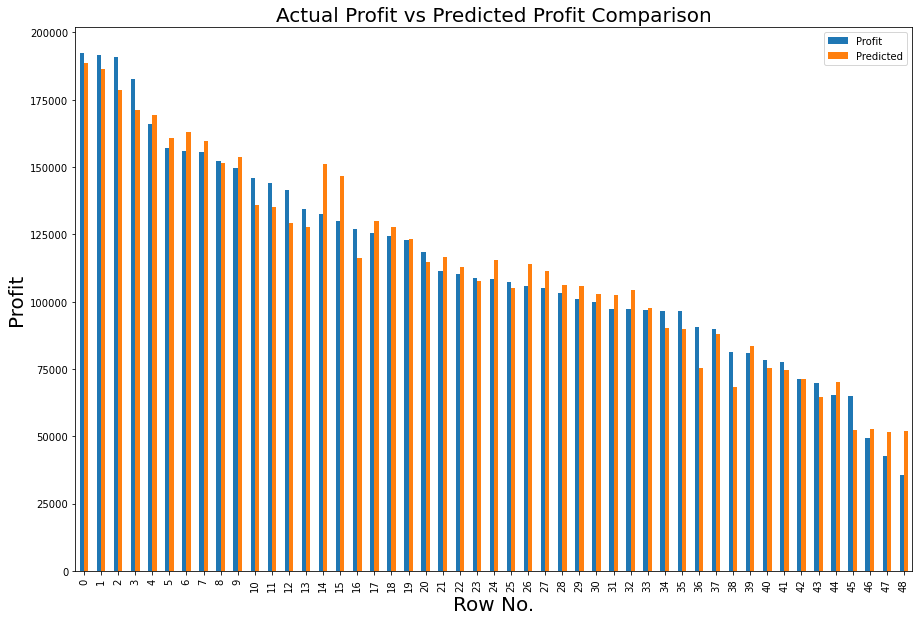

In [43]:
# Plotting scatter plot predict vas actual

Comparison.plot(kind='bar', figsize=(15,10))
plt.xlabel('Row No.', fontsize = 20)
plt.ylabel('Profit', fontsize = 20)
plt.title('Actual Profit vs Predicted Profit Comparison', fontsize = 20)
plt.show()

### Conclusion: 

* R-squared:	0.957
* Adj. R-squared:	0.956
* RMSE value : 7803.17
* R&D Spend is highly significant to make Profit.